In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("BeijingPM2.5Data.csv", index_col='No')

In [3]:
"""
1. No: row number
2. year: year of data in this row
3. month: month of data in this row
4. day: day of data in this row
5. hour: hour of data in this row
6. pm2.5: PM2.5 concentration (ug/m^3)
7. DEWP: Dew Point (℃)
8. TEMP: Temperature (℃)
9. PRES: Pressure (hPa)
10. cbwd: Combined wind direction
11. lws: Cumulated wind speed (m/s)
12. Is: Cumulated hours of snow
13. Ir: Cumulated hours of rain
"""

'\n1. No: row number\n2. year: year of data in this row\n3. month: month of data in this row\n4. day: day of data in this row\n5. hour: hour of data in this row\n6. pm2.5: PM2.5 concentration (ug/m^3)\n7. DEWP: Dew Point (℃)\n8. TEMP: Temperature (℃)\n9. PRES: Pressure (hPa)\n10. cbwd: Combined wind direction\n11. lws: Cumulated wind speed (m/s)\n12. Is: Cumulated hours of snow\n13. Ir: Cumulated hours of rain\n'

In [4]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
# merge datetime
date_cols = ['year', 'month', 'day', 'hour']
df['datetime'] = df[date_cols].apply(lambda x: '-'.join(x.values.astype(str)), axis = 'columns')
df['datetime'] = pd.to_datetime(df['datetime'], format="%Y-%m-%d-%H")

In [6]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
No,,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [7]:
# drop n/a values
df = df[['year', 'datetime', 'pm2.5']].dropna(axis = 0)

In [8]:
df['year'].unique()

array([2010, 2011, 2012, 2013, 2014], dtype=int64)

In [9]:
df_2010 = df[df['year'] == 2010]
df_2011 = df[df['year'] == 2011]
df_2012 = df[df['year'] == 2012]
df_2013 = df[df['year'] == 2013]
df_2014 = df[df['year'] == 2014]

In [10]:
import pywt
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [11]:
scales = np.array([1, 2, 4, 8, 16, 32, 64])

In [12]:
def _graph(time, concentration, year):
    fig, ax = plt.subplots(figsize=(18, 3))
#     title = str(year) + ' Beijing PM2.5 Concentration Change'
    ax.plot(time, concentration, label = 'PM2.5')
    ax.set_xlim([time.iloc[0], time.iloc[-1]])
    ax.set_ylim(0, 800)
    ax.set_ylabel('Amplitude')
    ax.set_title(str(year) + ' Beijing PM2.5 Concentration Change', fontsize=18)
    ax.set_xlabel('Time')
    ax.legend()

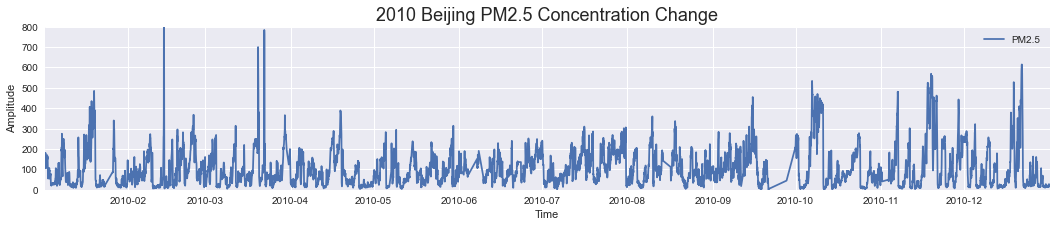

In [13]:
_graph(df_2010['datetime'], df_2010['pm2.5'], 2010) #plot and label the axis

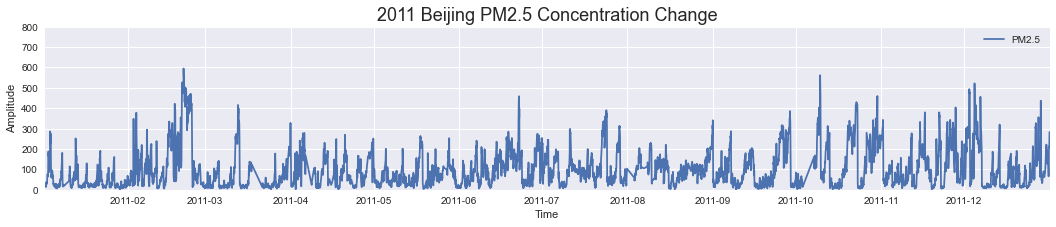

In [14]:
_graph(df_2011['datetime'], df_2011['pm2.5'], 2011) #plot and label the axis

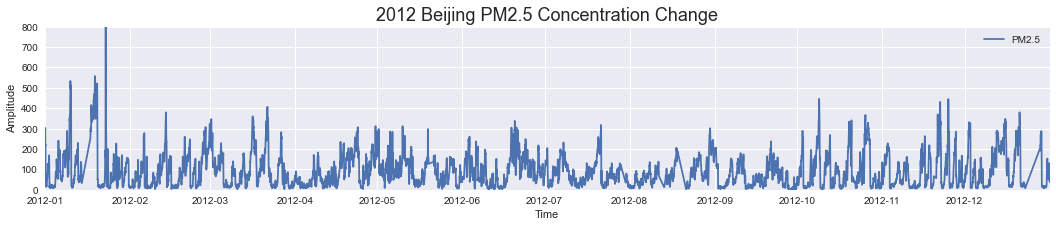

In [15]:
_graph(df_2012['datetime'], df_2012['pm2.5'], 2012) #plot and label the axis

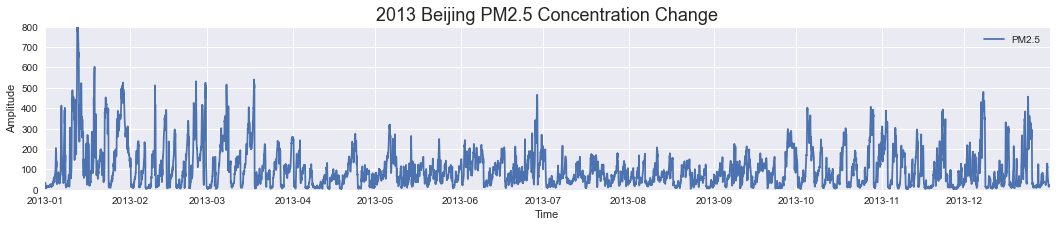

In [16]:
_graph(df_2013['datetime'], df_2013['pm2.5'], 2013) #plot and label the axis

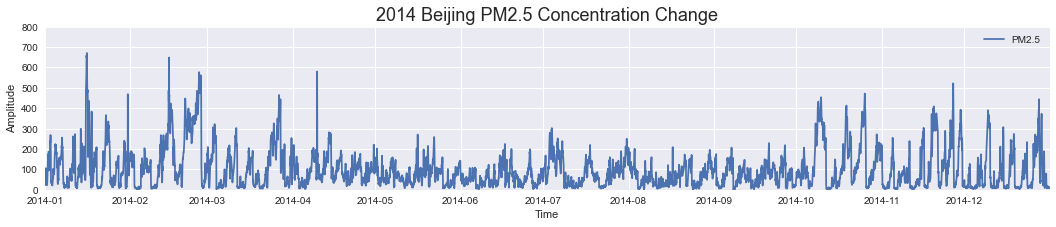

In [17]:
_graph(df_2014['datetime'], df_2014['pm2.5'], 2014) #plot and label the axis

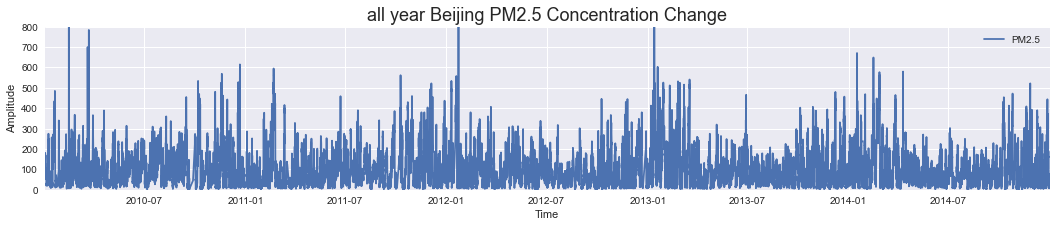

In [18]:
_graph(df['datetime'], df['pm2.5'], 'all year') #plot and label the axis

In [19]:
def _wavelet(time, concentration, scales, waveletname='cmor1.5-1.0', title='Wavelet Transform (Power Spectrum) of concentration change', ylabel='Period', xlabel='Time'):
    dt = 0.5
    [coefficients, frequencies] = pywt.cwt(concentration, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies

    scale0 = 8
    numlevels = 10

    levels = [scale0]
    for ll in range(1, numlevels):
        scale0 *= 2
        levels.append(scale0)

    contourlevels = np.log2(levels)
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(period), np.log2(power),
                     contourlevels, extend='both', cmap='spring')
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    yticks = 2**np.arange(np.ceil(np.log2(period.min())),
                          np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")

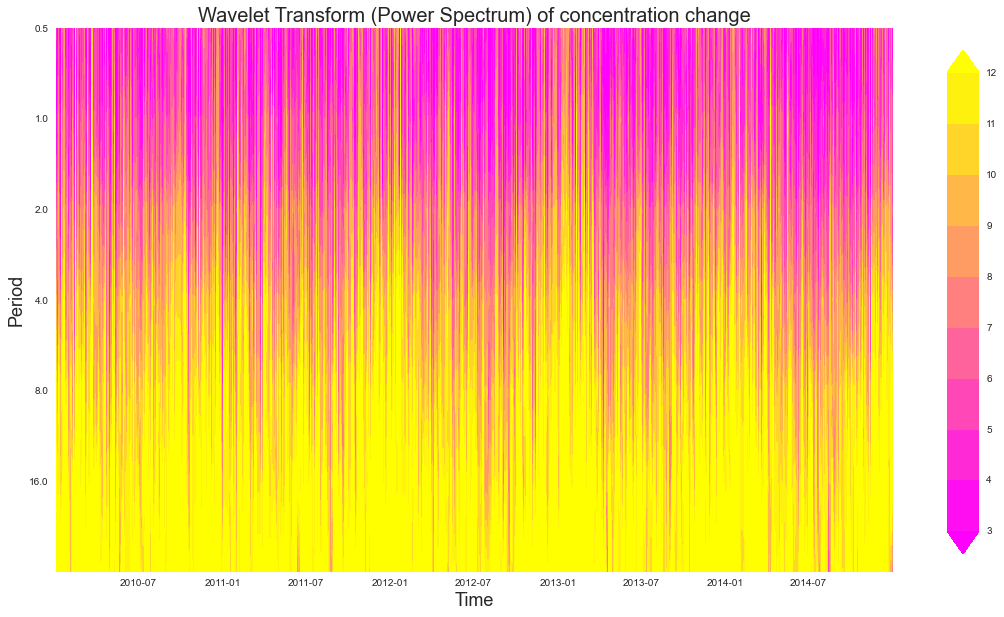

In [20]:
_wavelet(df['datetime'], df['pm2.5'], scales)